In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [115]:
class Gradient:
    def __init__(self):
        self.data, self.target, self.coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

        self.means = np.mean(self.data, axis=0)
        self.stds = np.std(self.data, axis=0)
        self.W = np.array([1, 0.5])
        
        for i in range(self.data.shape[0]):
            for j in range(self.data.shape[1]):
                self.data[i][j] = (self.data[i][j] - self.means[j])/self.stds[j]

    def mserror(self, X, w, y_pred):
        y = X.dot(w)
        return (sum((y - y_pred)**2)) / len(y)  
    

    def stoh_spusk(self):
        w = np.zeros(2)
        w_list = [w.copy()]
        errors = []
        eta = 0.5
        max_iter = 1e5
        min_weight_dist = 1e-8
        weight_dist = np.inf
        iter_num = 0
        np.random.seed(1234)
 
        while weight_dist > min_weight_dist and iter_num < max_iter:

            train_ind = np.random.randint(self.data.shape[0])

            new_w = w - 2 * eta * np.dot(self.data[train_ind].T, (np.dot(self.data[train_ind], w) - self.target[train_ind])) / self.target.shape[0]

            weight_dist = np.linalg.norm(new_w - w, ord=2)

            w_list.append(new_w.copy())
            errors.append(self.mserror(self.data, new_w, self.target))

            iter_num += 1
            w = new_w

        w_list = np.array(w_list)
        return w_list, errors
    
    def spusk(self):
        w = np.zeros(2)
        w_list = [w.copy()]
        errors = []
        eta = 0.01
        max_iter = 1e5
        min_weight_dist = 1e-13
        weight_dist = np.inf
        iter_num = 0
        w_true = np.random.normal(size=(2, ))
        
        # ход градиентного спуска
        while weight_dist > min_weight_dist and iter_num < max_iter:
            new_w = w - 2 * eta * np.dot(self.data.T, (np.dot(self.data, w) - self.target)) / self.target.shape[0]
            weight_dist = np.linalg.norm(new_w - w, ord=2)

            w_list.append(new_w.copy())
            errors.append(self.mserror(self.data, new_w, self.target))

            iter_num += 1
            w = new_w

        w_list = np.array(w_list)
        return w_list, w_true, errors

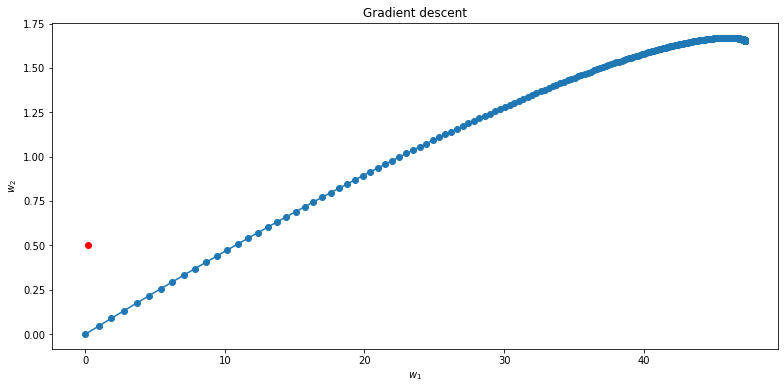

In [116]:
obj_1 = Gradient()
w_list, w_true, errors_spusk = obj_1.spusk()

plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

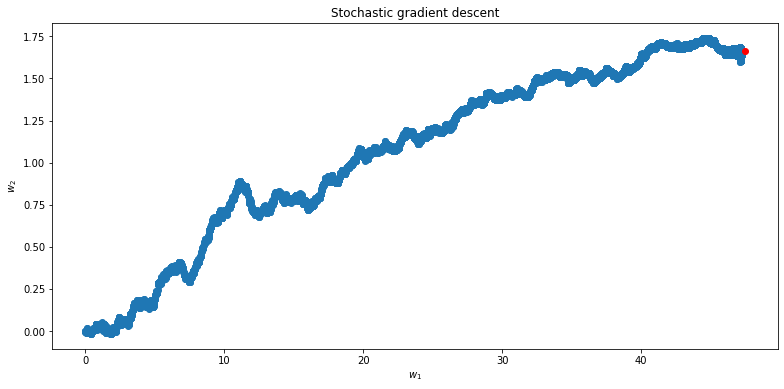

In [117]:
w_list, errors_stoh = obj_1.stoh_spusk()
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(obj_1.coef[0], obj_1.coef[1], c='r')

plt.show()

Text(0, 0.5, 'MSE')

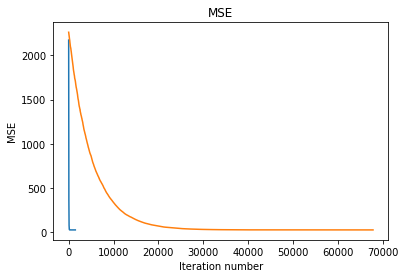

In [118]:
plt.plot(range(len(errors_spusk)), errors_spusk)
plt.plot(range(len(errors_stoh)), errors_stoh)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

### Задание_2


In [126]:
class Gradient:
    def __init__(self):
        self.data, self.target, self.coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

        self.means = np.mean(self.data, axis=0)
        self.stds = np.std(self.data, axis=0)
        self.W = np.array([1, 0.5])
        
        for i in range(self.data.shape[0]):
            for j in range(self.data.shape[1]):
                self.data[i][j] = (self.data[i][j] - self.means[j])/self.stds[j]

    def mserror(self, X, w, y_pred):
        y = X.dot(w)
        return (sum((y - y_pred)**2)) / len(y)  
    

    def stoh_spusk(self):
        w = np.zeros(2)
        w_list = [w.copy()]
        errors = []
        eta = 0.5
        max_iter = 1e5
        min_weight_dist = 1e-8
        weight_dist = np.inf
        iter_num = 0
        np.random.seed(1234)
        l2 = 0.1
 
        while weight_dist > min_weight_dist and iter_num < max_iter:

            train_ind = np.random.randint(self.data.shape[0])

            new_w = w - 2 * eta * (np.dot(self.data[train_ind].T, (np.dot(self.data[train_ind], w) - self.target[train_ind])) - l2*w) / self.target.shape[0]

            weight_dist = np.linalg.norm(new_w - w, ord=2)

            w_list.append(new_w.copy())
            errors.append(self.mserror(self.data, new_w, self.target))

            iter_num += 1
            w = new_w

        w_list = np.array(w_list)
        return w_list, errors
    
    def spusk(self):
        w = np.zeros(2)
        w_list = [w.copy()]
        errors = []
        eta = 0.01
        max_iter = 1e5
        min_weight_dist = 1e-13
        weight_dist = np.inf
        iter_num = 0
        w_true = np.random.normal(size=(2, ))
        l2 = 0.1
        
        # ход градиентного спуска
        while weight_dist > min_weight_dist and iter_num < max_iter:
            new_w = w - 2 * eta * (np.dot(self.data.T, (np.dot(self.data, w) - self.target)) - l2*w) / self.target.shape[0]
            weight_dist = np.linalg.norm(new_w - w, ord=2)

            w_list.append(new_w.copy())
            errors.append(self.mserror(self.data, new_w, self.target))

            iter_num += 1
            w = new_w

        w_list = np.array(w_list)
        return w_list, w_true, errors

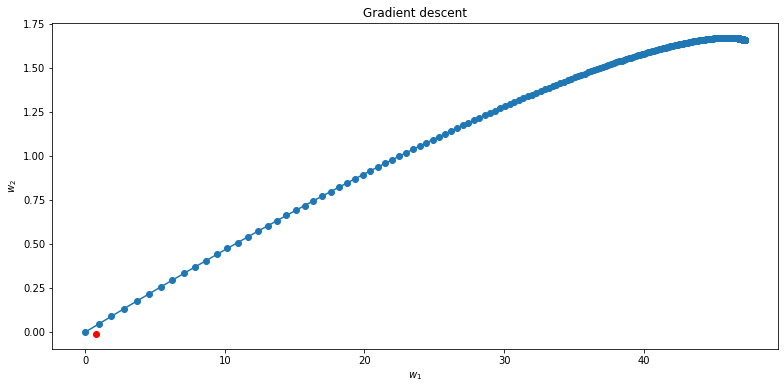

In [127]:
obj_1 = Gradient()
w_list, w_true, errors_spusk = obj_1.spusk()

plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

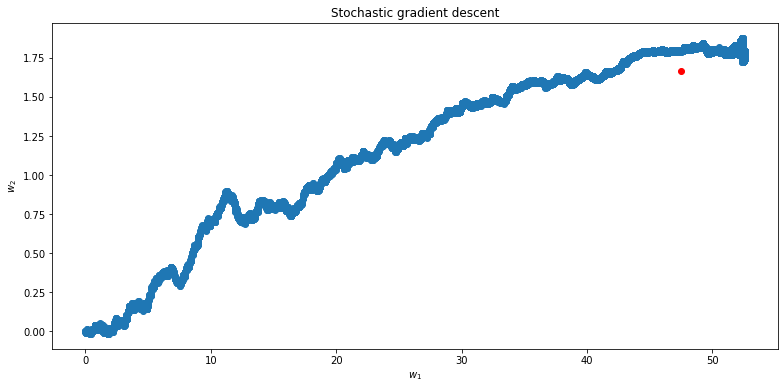

In [128]:
w_list, errors_stoh = obj_1.stoh_spusk()
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(obj_1.coef[0], obj_1.coef[1], c='r')

plt.show()

Text(0, 0.5, 'MSE')

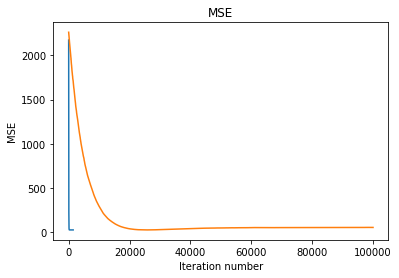

In [129]:
plt.plot(range(len(errors_spusk)), errors_spusk)
plt.plot(range(len(errors_stoh)), errors_stoh)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')